In [1]:
# 1. One time script (this is not main use-case i think, but good starting point for most companies like Waddle.
# 2. one time script converted to reliable threshold-based test. Use @pytest.mark.fastrepl,
# https://github.com/baserun-ai/baserun-py/blob/main/baserun/unittests_class.py Can do 'extras' for test dependancy

# 3. REPL: This is core thing. This is intented to work inside notebook

In [1]:
# # Non-notebook
# import fastrepl  # now use it. should keep depth short

# # Notebook env
import fastrepl.repl as fastrepl  # Just import from repl and alias it


# Caveat
# import fastrepl.llm_cache ?? can we map this properly?

In [3]:
# Let's start with meta-eval.

# No, to do that, we need updatable in place.
# So the steps is, implement anaylisis here.
# We need some decorator to reused shared fns, and use it for both non-repl and repl
# So here, we can visulaize...

# So our default evals should have Updatable. input context should be all Union[str, Updatable] and handle it accordingly
# Also it should be easy to target specific Updatable in notebook.
# That's why viz is important / -> For this, each key itself should be unique, no?


# Problem: What if user's system code and eval's code both use Updatable?
# If we think execution order, it is not a problem though? if we properly mark it or namespace it, no problem and nicer to vizuaklize

In [4]:
from fastrepl.repl.context import REPLContext
import inspect

from fastrepl.utils import LocalContext

REPLContext.trace(LocalContext(inspect.stack()[0]), "a", "1")
REPLContext.trace(LocalContext(inspect.stack()[0]), "b", "2")
REPLContext.trace(LocalContext(inspect.stack()[0]), "c", "3")
REPLContext.trace(LocalContext(inspect.stack()[1]), "d", "4")
REPLContext.trace(LocalContext(inspect.stack()[1]), "e", "5")

## TODO: All looks good
# BUT!
# if we execute cell multiple time, duplicated key error will be raised. (TODO: Custom error)
# Before we handled it with runs...

# Also we need ways to extend graph. pass args to get closer loook, see values(rich or ipywidget)

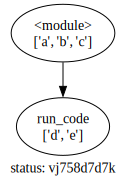

In [5]:
fastrepl.graph()